In [1]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import platform

In [1]:
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

NameError: name 'platform' is not defined

In [4]:
wine1 = pd.read_csv('C:/Users/igksj/Desktop/분반 자료/wine1.csv', sep='\t')
wine2 = pd.read_csv('C:/Users/igksj/Desktop/분반 자료/wine2.csv',sep='\t')

In [ ]:
from  glob import glob
wine1 = pd.read_csv(glob('w*.csv')[0], sep='\t')
wine2 = pd.read_csv(glob('w*.csv')[0], sep='\t')

In [5]:
# 새로운 인덱스의 교집합

intersection_idx = list(set(wine1['index']).intersection(wine2['index']))


# 교집합에 존재하는 데이터만 불러오기
wine = wine1.loc[
    wine1['index'].apply(lambda x: x in intersection_idx)].copy()

wine = wine.sort_values(by = 'index').reset_index(drop=True) 
wine['class'].min(), wine['class'].max()

print(wine.info())
print(wine.head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    6497 non-null   int64  
 1   alcohol  6497 non-null   float64
 2   class    6493 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 152.4 KB
None
    index  alcohol  class
0       1      9.4    0.0
1       2      9.8    0.0
2       4      9.8    0.0
3       5      9.4    0.0
4       6      9.4    NaN
5       7      9.4    0.0
6       8     10.0    0.0
7       9      9.5    0.0
8      11      9.2    NaN
9      12     10.5    0.0
10     13      9.9    0.0
11     14      9.1    0.0
12     15      9.2    0.0
13     16      9.2    0.0
14     17     10.5    0.0
15     18      9.3    0.0
16     19      9.0    0.0
17     20      9.2    NaN
18     21      9.4    0.0
19     22      9.7    0.0


In [6]:
# ★★★★★★★ [미션] ★★★★★★★
########################################
### wine자료와 wine2 자료를  연결하여서
### wine의 index번호에 해당하는
### wine2자료의 sugar_PH값 가져와  df 데이터셋 제작
### df 데이터셋의 sugar_PH의  값 분리하여
### df['sugar']   df['PH'] 변수로 작성
#######################################


## merge 로 두데이터 조인
df=pd.merge(wine, wine2) # 옵션이 없으면 wine1, wine2의 필드가 같은걸 자동으로 연결, index필드가 같은 자료만 가져온다.


# 파이썬 컴프리헨션(압축기법)
#df['sugar']=[x.split('/')[0] if pd.notnull(x) else x for x in tmp['sugar_PH']]

df['sugar'] = df['sugar_PH'].apply(
    lambda x: x.split('/')[0] if pd.notnull(x) else x)

df['PH'] = df['sugar_PH'].apply(
    lambda x: x.split('/')[1] if pd.notnull(x) else x)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     6497 non-null   int64  
 1   alcohol   6497 non-null   float64
 2   class     6493 non-null   float64
 3   sugar_PH  6497 non-null   object 
 4   sugar     6497 non-null   object 
 5   PH        6497 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 355.3+ KB


In [8]:
# 이중 리스트 구조 만들기
dfTmp=pd.merge(wine1,wine2)
dataList=[]; mainList=[]

for i in dfTmp['sugar_PH']:
  List=[]
  for j in i.split('/'):
    List.append(j)
  mainList.append(List)
print(mainList[:10])



import numpy as np
dfTmp['sugar']=np.array(mainList)[:,0]  # [:,0] 모든행, 0번열
dfTmp['PH']=np.array(mainList)[:,1]     # [:,1] 모든행, 1번열


[['1.9', '3.51'], ['2.6', '3.2'], ['2.3', '3.26'], ['1.9', '3.16'], ['1.9', '3.51'], ['1.8', '3.51'], ['1.6', '3.3'], ['1.2', '3.39'], ['2', '3.36'], ['6.1', '3.35']]


In [10]:
df = df.drop(['index','sugar_PH'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   class    6493 non-null   float64
 2   sugar    6497 non-null   object 
 3   PH       6497 non-null   object 
dtypes: float64(2), object(2)
memory usage: 253.8+ KB


In [ ]:
import time
start = time.time()

for x in df.columns:
    if df[x].dtype=='object':
        df[x]=df[x].astype('float64')

print(time.time()-start)

In [ ]:
[df[x].astype('float64') if df[x].dtype=='object' else x for x in df.columns]

In [ ]:
# 방법1
df['sugar'] = df['sugar'].astype('float64')
df['PH'] = df['PH'].astype('float64')

# 방법2
col = ['sugar','PH']
for x in col:
    df[x]=df[x].astype('float64')

# 방법3
for x in df.columns:
    if df[x].dtype=='object':
        df[x]=df[x].astype('float64')

# 방법4:압축방식
[df[x].astype('float64') if df[x].dtype=='object' else x for x in df.columns]


In [ ]:
## 방법1 : 사용자가 변수를 직접 지정하고 일일이 명령어를 작업
df['sugar']=df['sugar'].astype('float64')
df['PH']=df['PH'].astype('float64')



## 방법2: 공통된 기능을 수행하는 변수명을 모아서 for로 반복함. 또는 사용자정의 함수 작성해도 됨
col=['sugar','PH']
for x in col:
    df[x]=df[x].astype('float64')
df.info()


## 방법3: 만약에object 관련 모든 변수를 숫자로 변형한다면 아래와 같이 작업
for x in df.columns:
    if df[x].dtype=='object':
        df[x]=df[x].astype('float64')

## 방법4: 방법3을 압축한 형식
[df[x].astype('float64') if df[x].dtype=='object' else x for x in df.columns]   # 방법4-1
[df[x].astype('float64') for x in df.columns  if df[x].dtype=='object']         # 방법4-2


In [ ]:
# class의 결측치를 0으로 치환하고자 함.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

#  결측치를 0으로 채우기
df[df.select_dtypes(include=numerics).columns] =df[df.select_dtypes(include=numerics).columns].fillna(0)
df.info()

# for를 이용하여 결측치를 0으로 채우기


In [ ]:
#### 지금까지 작업


# 자료읽기 및 데이터 병합
from glob import glob
wine1=pd.read_csv('wine1.csv',sep='\t')
wine2=pd.read_csv('wine2.csv',sep='\t')
df=pd.merge(wine1,wine2)
display(df.head())

# 필드분할, 파이썬 컴프리헨션(압축기법)
df['sugar']=[x.split('/')[0] if pd.notnull(x) else x for x in df['sugar_PH']]
df['PH']=[x.split('/')[1] if pd.notnull(x) else x for x in df['sugar_PH']]


# 필드제거
df=df.drop(['index','sugar_PH'],axis=1)


# 숫자자료인데 object로 되어 있는 자료 float64로 형 변환
col=['sugar','PH']
for x in col:
    df[x]=df[x].astype('float64')
df.info()


# NUll값 채움
## class의 결측치를 0으로 치환하고자 함.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

#  모든 숫자변수의 결측치를 0으로 채우기
df[df.select_dtypes(include=numerics).columns] =df[df.select_dtypes(include=numerics).columns].fillna(0)


df.isna().sum()

In [6]:
wine1.head()

,index,alcohol,class
0,7001,9.90,999.0
1,1,9.40,0.0
2,2,9.80,0.0
3,3,9.99,999.0
4,6498,9.80,0.0


In [7]:
wine2.head()

,index,sugar_PH
0,7000,2.3/3.5
1,1,1.9/3.51
2,2,2.6/3.2
3,6498,2.3/3.26
4,4,1.9/3.16


In [8]:
wine = pd.merge(wine1,wine2,how='inner',on='index')

In [9]:
wine.head()

,index,alcohol,class,sugar_PH
0,1,9.4,0.0,1.9/3.51
1,2,9.8,0.0,2.6/3.2
2,6498,9.8,0.0,2.3/3.26
3,4,9.8,0.0,1.9/3.16
4,5,9.4,0.0,1.9/3.51


In [10]:
wine['class'].max(), wine['class'].min()

(1.0, 0.0)

In [11]:
wine = wine.sort_values('index').copy()
wine.head()

,index,alcohol,class,sugar_PH
0,1,9.4,0.0,1.9/3.51
1,2,9.8,0.0,2.6/3.2
3,4,9.8,0.0,1.9/3.16
4,5,9.4,0.0,1.9/3.51
5,6,9.4,NaN,1.8/3.51


In [12]:
df = wine.copy().reset_index(drop=True)
df.head()

,index,alcohol,class,sugar_PH
0,1,9.4,0.0,1.9/3.51
1,2,9.8,0.0,2.6/3.2
2,4,9.8,0.0,1.9/3.16
3,5,9.4,0.0,1.9/3.51
4,6,9.4,NaN,1.8/3.51


In [13]:
df['sugar'] = df['sugar_PH'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else x)
df['PH'] = df['sugar_PH'].apply(lambda x: x.split('/')[1] if pd.notnull(x) else x)
df.head()

,index,alcohol,class,sugar_PH,sugar,PH
0,1,9.4,0.0,1.9/3.51,1.9,3.51
1,2,9.8,0.0,2.6/3.2,2.6,3.2
2,4,9.8,0.0,1.9/3.16,1.9,3.16
3,5,9.4,0.0,1.9/3.51,1.9,3.51
4,6,9.4,NaN,1.8/3.51,1.8,3.51


In [14]:
df.shape

(6497, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     6497 non-null   int64  
 1   alcohol   6497 non-null   float64
 2   class     6493 non-null   float64
 3   sugar_PH  6497 non-null   object 
 4   sugar     6497 non-null   object 
 5   PH        6497 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 304.7+ KB


In [16]:
df['sugar'] = df['sugar'].astype('float64')
df['PH'] = df['PH'].astype('float64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     6497 non-null   int64  
 1   alcohol   6497 non-null   float64
 2   class     6493 non-null   float64
 3   sugar_PH  6497 non-null   object 
 4   sugar     6497 non-null   float64
 5   PH        6497 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 304.7+ KB


In [18]:
df.fillna(0)
df.isna().sum()

index       0
alcohol     0
class       4
sugar_PH    0
sugar       0
PH          0
dtype: int64

In [22]:
df['class'] =df['class'].fillna(0)
df.isna().sum()

index      0
alcohol    0
class      0
sugar      0
PH         0
dtype: int64

In [19]:
del df['sugar_PH']
df.head()

,index,alcohol,class,sugar,PH
0,1,9.4,0.0,1.9,3.51
1,2,9.8,0.0,2.6,3.20
2,4,9.8,0.0,1.9,3.16
3,5,9.4,0.0,1.9,3.51
4,6,9.4,NaN,1.8,3.51


<AxesSubplot:>

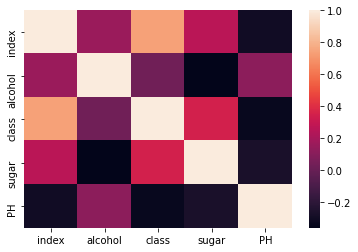

In [23]:
sns.heatmap(df.corr(),annot=False)

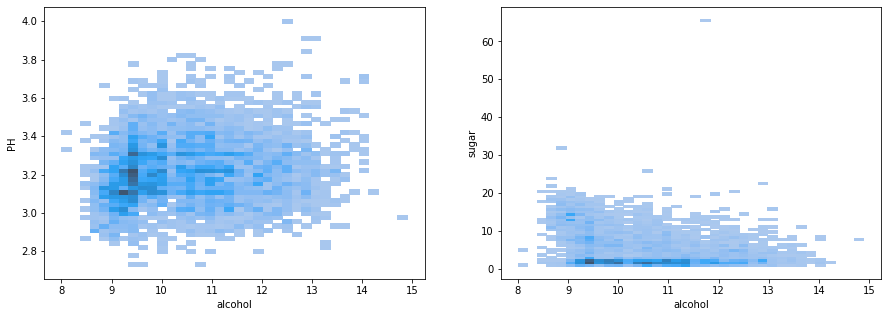

In [25]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=df,x='alcohol',y='PH',kde=True,ax=ax[0])
sns.histplot(data=df,x='alcohol',y='sugar',kde=True,ax=ax[1])
plt.show()

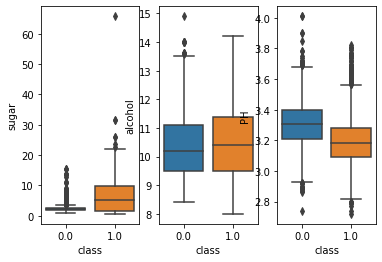

In [28]:
plt.subplot(1,3,1)
sns.boxplot(x='class',y='sugar',data=df)
plt.subplot(1,3,2)
sns.boxplot(x='class',y='alcohol',data=df)
plt.subplot(1,3,3)
sns.boxplot(x='class',y='PH',data=df)
plt.show()

### 데이터 분할

In [29]:
x_data = df[['index','alcohol','sugar','PH']]
y_data = df['class']

In [31]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x_data,y_data,test_size=0.3,random_state=1)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(train_X)
train_scaled = scaler.transform(train_X)
scaler.fit(test_X)
test_scaled = scaler.transform(test_X)

In [33]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(train_X,train_y)

In [ ]:
## 참고 예측
# 새로운 new_X값도스케일링 하고 예측해야함.
# alcohol, sugar, PH값이

# new_X는 사용자가 웹에서 직접 입력할수도 있고, csv자료일수도 있고, 크롤링으로 얻어온 자료일수도 있고
# 또는 이미지 또는 사운드의 내용일수도 있음.

# 이 작업은 보통, 위에 있는 작업을 모두 피클링 또는 dump해서 객체화 시켜서 갖고 있게됨.

# 또는 머신러닝에서도 모델값만 갖고 있게 됨.
# 또는 딥러닝 같은경우는 모델값만 갖고 있게됨

new_XX= np.array([
    [15, 30, 1.08]
])

from sklearn.linear_model import LogisticRegression # 만약 위의 내용이 없다면 꼭 해야함.
from sklearn.preprocessing import StandardScaler   # 만약 위의 내용이 없다면 꼭 해야함.
scaler = StandardScaler()  # 만약 위의 내용이 없다면 꼭 해야함.
scaler.fit(new_X)          # 만약 위의 내용이 없다면 꼭 해야함. 

newX_scaled = scaler.transform(new_XX)
y_hat = lr.predict(newX_scaled)

print(int(y_hat[0]))
#이 자료의 class가 1이면 화이트 화인/0이면 레드와인
classLabel=['red wine','wihte wine']
print(classLabel[int(y_hat[0])])

# 
확률=lr.predict_proba(new_XX)   # 출력물이 [0.,1.]  1이될확률이 1이예요. [0.2,0.8]은 1이될확률이 0.8이예요
classLabel[np.argmax(확률)]  # [0,1]은 1번째 값이 가장 큼. 즉 가장 큰값의 index가 나옴
